# THE SPARK FOUNDATION DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP 

## TASK 4: EXPLORATORY DATA ANALYSIS - TERRORISM
## Preetam Chakrabartty

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True)

In [36]:
#Loading the dataset
df_total=pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "latin")
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [37]:
#Dropping columns with missing values
df=df_total.dropna(axis=1)
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [38]:
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'vicinity', 'crit1', 'crit2',
       'crit3', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'gname', 'individual', 'weaptype1',
       'weaptype1_txt', 'property', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')


In [4]:
#Filling the missing values in 'nkill' and 'nwound' columns in df_total with 0
#Adding these to the df dataframe
df['killed']=df_total['nkill'].fillna(0).astype(int)
df['wounded']=df_total['nwound'].fillna(0).astype(int)
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'vicinity', 'crit1', 'crit2',
       'crit3', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'gname', 'individual', 'weaptype1',
       'weaptype1_txt', 'property', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'killed', 'wounded'],
      dtype='object')


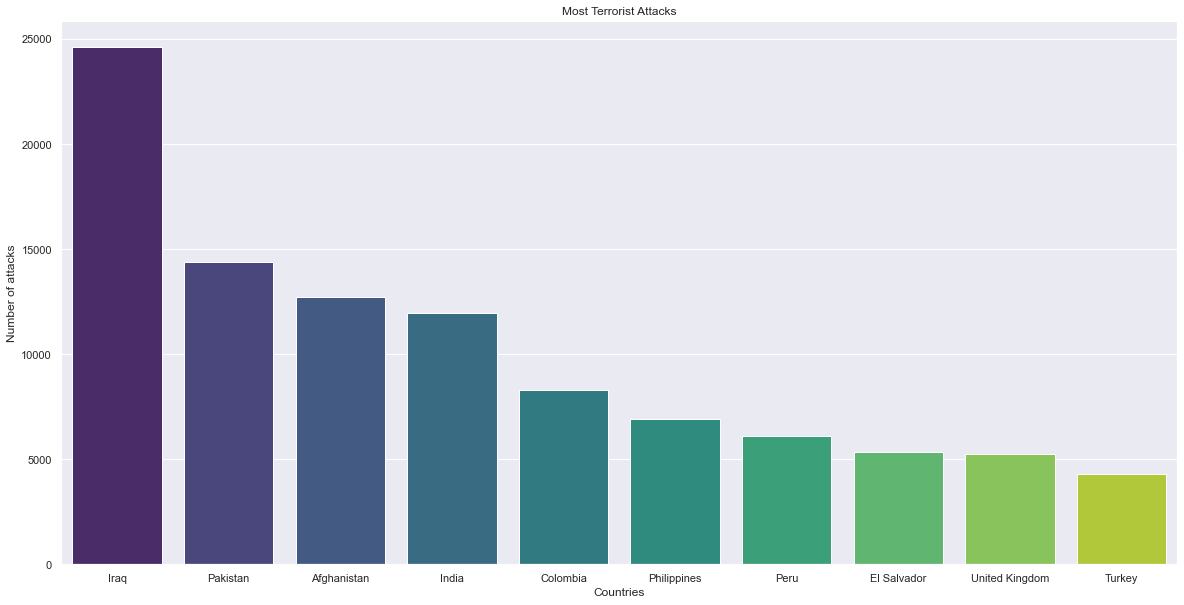

In [5]:
#Plotting the countries with most terrorist attacks
plt.subplots(figsize=(20,10))
sns.countplot('country_txt', data=df,order=df.country_txt.value_counts().iloc[:10].index,palette='viridis')
plt.title("Most Terrorist Attacks")
plt.xlabel('Countries')
plt.ylabel('Number of attacks')
plt.show()

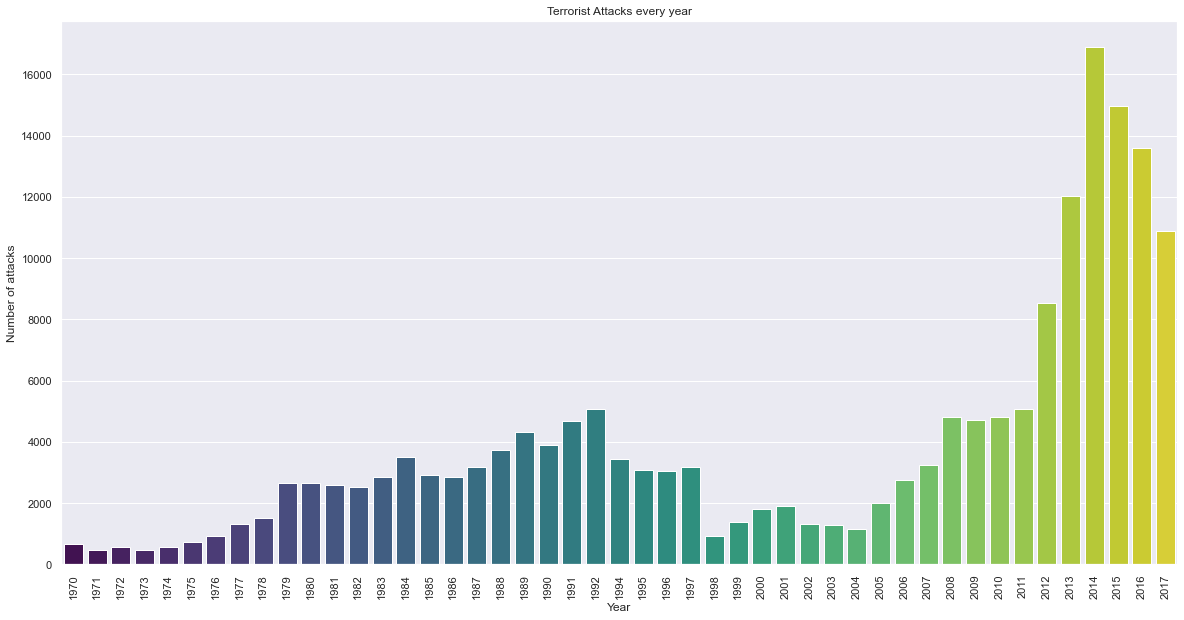

In [6]:
#Plotting number of attacks over the years
plt.subplots(figsize=(20,10))
sns.countplot('iyear', data=df,palette='viridis')
plt.xticks(rotation=90)
plt.title("Terrorist Attacks every year")
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()

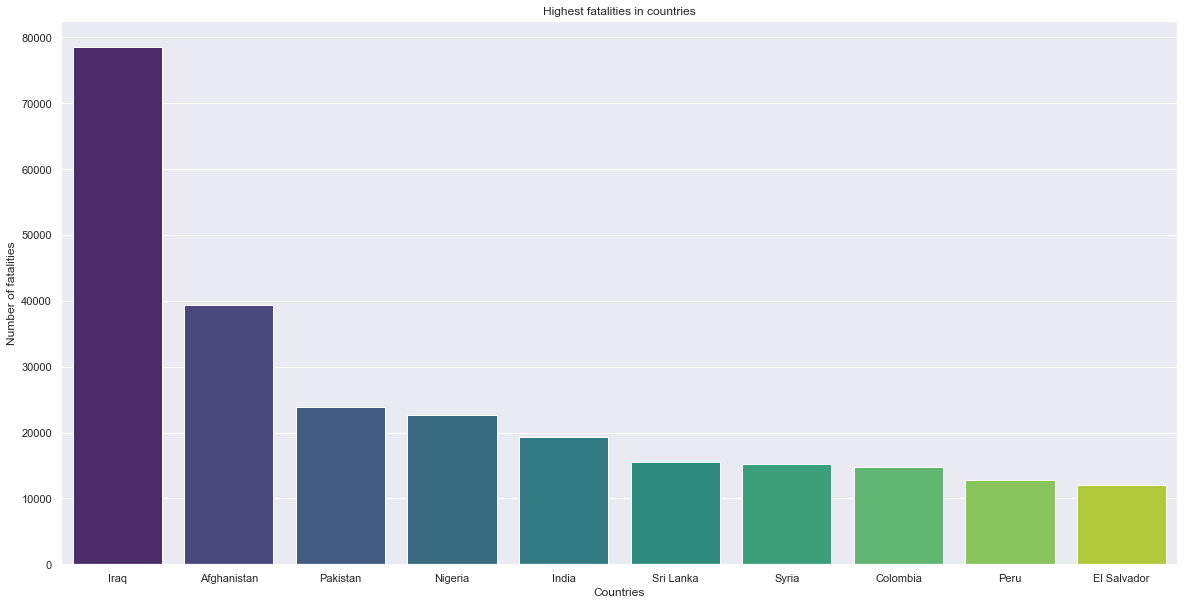

In [7]:
#Plotting the countries with highest fatalities
plt.subplots(figsize=(20,10))
df_kill=df.groupby(['country_txt'])['killed'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=df_kill.index,y=df_kill.values,palette='viridis')
plt.title("Highest fatalities in countries")
plt.xlabel('Countries')
plt.ylabel('Number of fatalities')
plt.show()

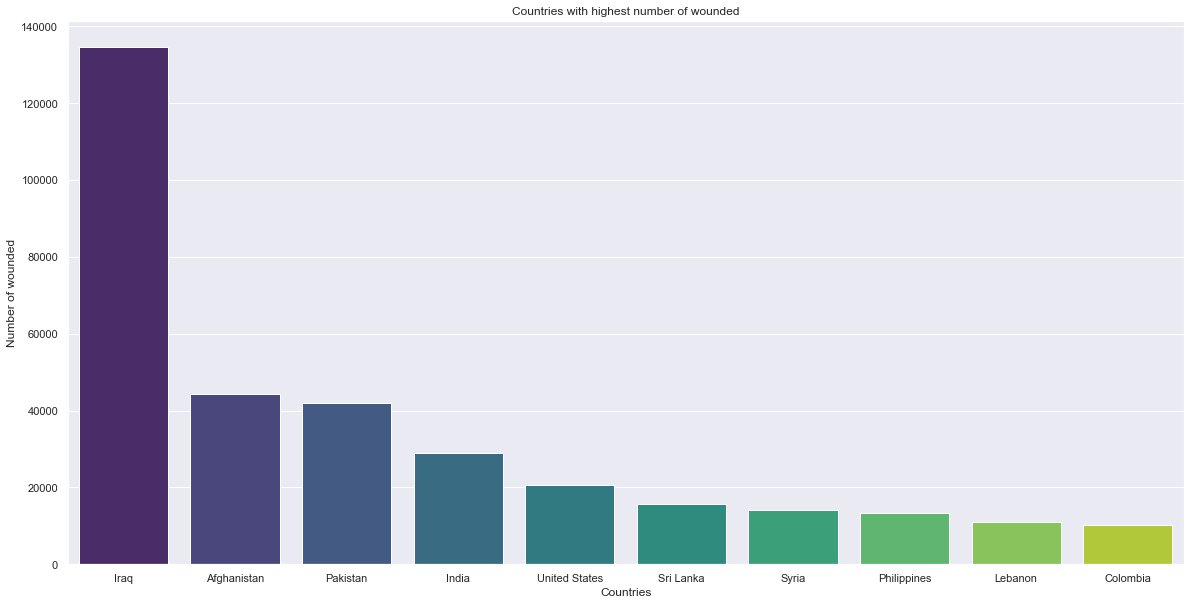

In [8]:
#Plotting the countries with highest number of wounded
plt.subplots(figsize=(20,10))
df_wound=df.groupby(['country_txt'])['wounded'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=df_wound.index,y=df_wound.values,palette='viridis')
plt.title("Countries with highest number of wounded")
plt.xlabel('Countries')
plt.ylabel('Number of wounded')
plt.show()

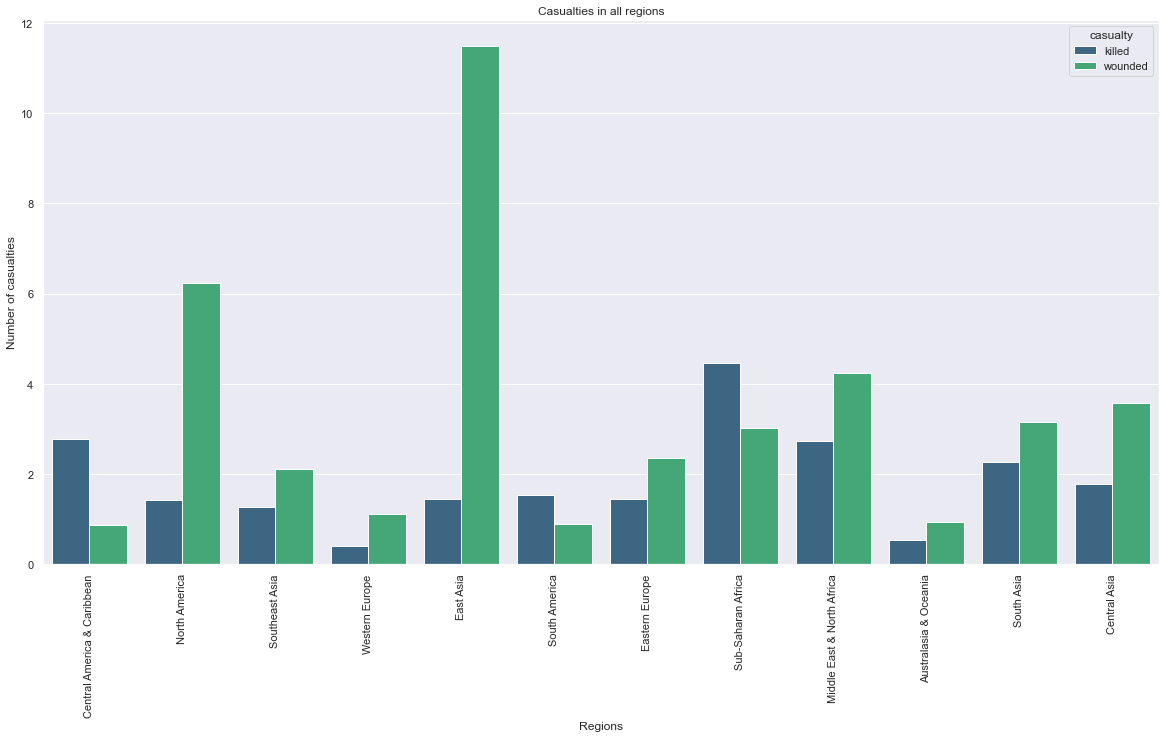

In [9]:
#Plotting casualties in different regions
df1=df[['region_txt','killed','wounded']]
df1=pd.melt(df1, id_vars="region_txt", var_name="casualty", value_name="count")
plt.subplots(figsize=(20,10))
sns.barplot(x='region_txt',y='count',hue='casualty',data=df1,palette='viridis',ci=None)
plt.xticks(rotation=90)
plt.title("Casualties in all regions")
plt.xlabel("Regions")
plt.ylabel("Number of casualties")
plt.show()

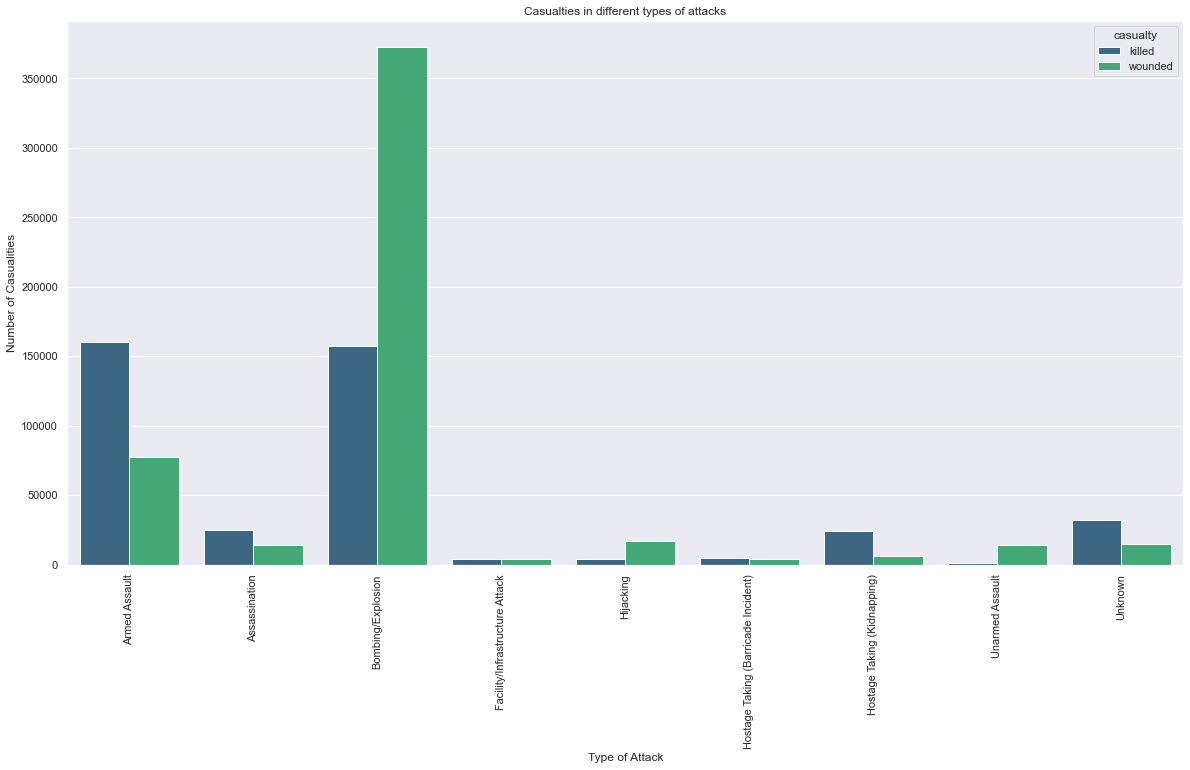

In [35]:
#Plotting casualties in different types of attacks
x=df.groupby(['attacktype1_txt'])['killed'].sum()
y=df.groupby(['attacktype1_txt'])['wounded'].sum()
df2=pd.DataFrame.from_dict({'attacktype':x.index,'killed':x.values,'wounded':y.values})
df2=pd.melt(df2, id_vars="attacktype", var_name="casualty", value_name="count")
plt.subplots(figsize=(20,10))
sns.barplot(x='attacktype',y='count',hue='casualty',data=df2,palette='viridis',ci=None)
plt.xticks(rotation=90)
plt.title("Casualties in different types of attacks")
plt.xlabel("Type of Attack")
plt.ylabel("Number of Casualities")
plt.show()

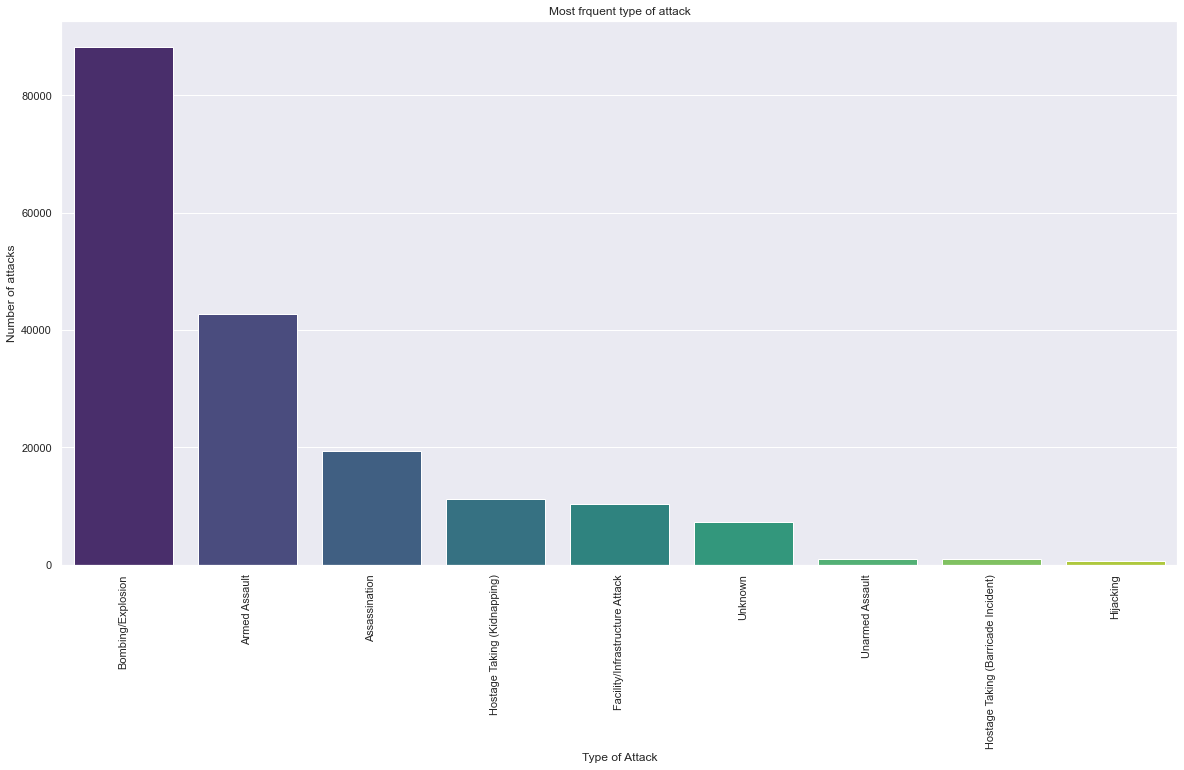

In [11]:
#Most frequent types of terrorist attacks
plt.subplots(figsize=(20,10))
sns.countplot('attacktype1_txt', data=df, order=df['attacktype1_txt'].value_counts().index,palette='viridis')
plt.xticks(rotation=90)
plt.title("Most frquent type of attack")
plt.xlabel("Type of Attack")
plt.ylabel("Number of attacks")
plt.show()

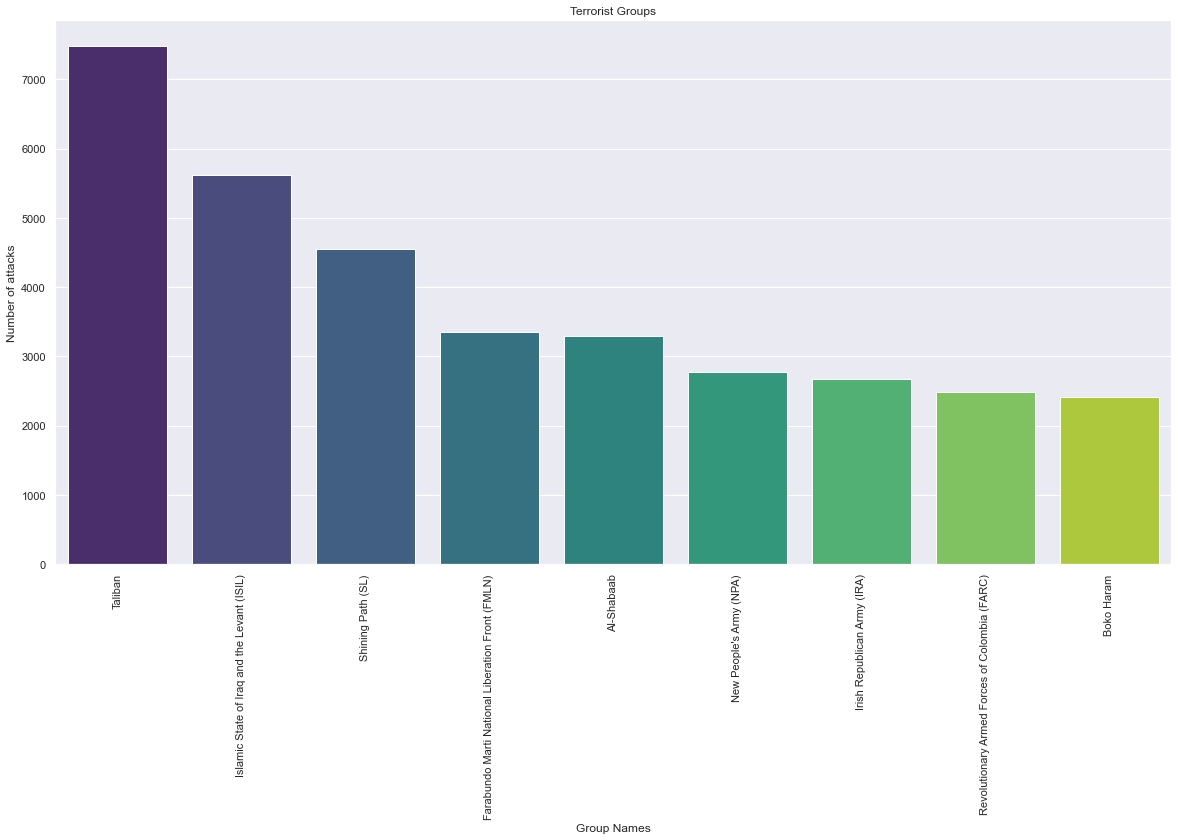

In [17]:
#Terrorist group responsible for most attacks
plt.subplots(figsize=(20,10))
sns.countplot('gname', data=df,order=df.gname.value_counts().iloc[1:10].index,palette='viridis')
plt.title("Terrorist Groups")
plt.xticks(rotation=90)
plt.xlabel('Group Names')
plt.ylabel('Number of attacks')
plt.show()

# Iraq has the maximum number of terrorist attacks.
# The maximum number of terrorist attacks occur in 2014.
# The maximum number of killed and injured are in Iraq but there are few variations in the top 10 countries.
# East Asia and North America have highest number of wounded while Sub- Saharan Africa and Central America have maximum number of fatalities
# Bombing and Armed Assaults are responsible for maximum casualties and Bombing is the most frequent
# Explosives were used the most
# Taliban recorded for the most attacks
#
#